In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
np.version.version

'1.17.4'

# plotting simple function

In [6]:
### y= f(x)
### y = x*x*x
def f(x):
    return x*x*x

def plot(x):
    plt.plot(x,f(x),'bo',x,f(x),'k') 

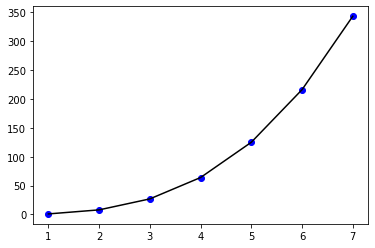

In [7]:
plot(np.array([1,2,3,4,5,6,7]))

# Linear Regression and Cost function Example

In [8]:
a = np.array([1,8,6,2,6,9])

In [9]:
b = np.array([2,7,9,0,4,11])

In [10]:
df = pd.DataFrame({'posts this week':a,'posts next week': b})

In [11]:
df = df.sort_values(by="posts this week",ascending=True)

In [12]:
df

,posts this week,posts next week
0,1,2
3,2,0
2,6,9
4,6,4
1,8,7
5,9,11


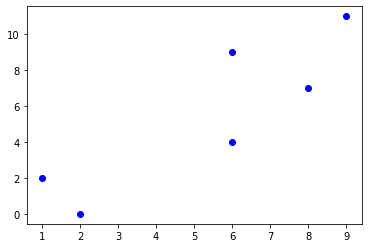

In [13]:
plt.plot(df['posts this week'],df['posts next week'],'bo')

### The estimation is based on the Covariance Formula

In [14]:
def estimate_coefficient(x,y):
    ## size of the array 
    n = np.size(x)
    ## calclate the mean of x and y arrays
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    ## calculate the cross product deviations of x and y 
    ss_xy = np.sum(x*y) -n*mean_x*mean_y
    ## calculate the standard deviation of x (variance(x))
    ss_xx = np.sum(x*x) -n*mean_x*mean_x 
    ## calculate the coefficient a and b 
    b = ss_xy/ss_xx
    a = mean_y - b*mean_x
    ## list coeff
    l = []
    l.append(a)
    l.append(b)
    return l 
    

In [15]:
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 


In [16]:
# estimating coefficients 
c = estimate_coefficient(a,b) 

In [17]:
c 

[-0.6298701298701284, 1.1493506493506491]

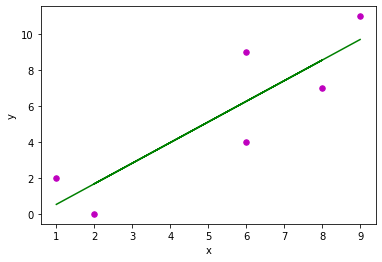

In [18]:
plot_regression_line(a,b,c)

In [19]:
## let's predict the next week's post when we have 20 posts this week
y_prediction = c[0] + c[1]*20

In [20]:
np.trunc(y_prediction)

22.0

In [21]:
def cost_function(x,y,b):
    y_pred = b[0] + b[1]*x 
    cost = np.sum((y-y_pred)*(y-y_pred))/2*np.size(x)
    return cost

In [22]:
cost_function(a,b,c)

65.06493506493504

## The best cost function is the closest to 0. 
we should minimize our cost function<br>
we can use the gradient descent algorithm 

### The estimation is based on the Gradient Descent

In [47]:
## Reset the coefficient 
## I chose these value intentionally to use less computational power
c = [1,2]

In [37]:
learningRate = 0.01
def gradient_descent(x,y,b):
    for i in x:
        y_pred = b[0] + b[1]*x 
        b[0] = b[0] -learningRate*np.sum((y_pred-y)*i)/np.size(x)
        b[1] = b[1] -learningRate*np.sum((y_pred-y)*i)/np.size(x)
        cost = np.sum((y-y_pred)*(y-y_pred))/2*np.size(x)
        plt.scatter(x,y)
        plt.plot(x,y_pred)
        return cost
    

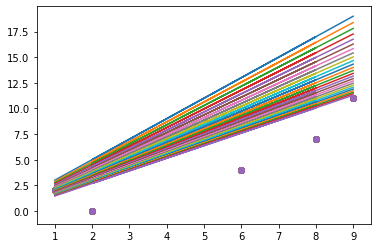

In [38]:
while gradient_descent(a,b,c) > 100 :
    gradient_descent(a,b,c)

In [26]:
print(c)

[0.09290529654681479, 1.0929052965468142]


### a closer result for the cost function 

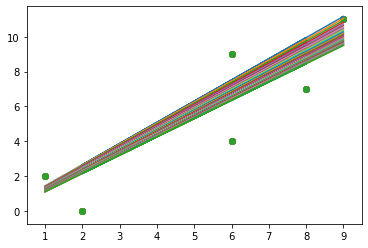

In [39]:
while gradient_descent(a,b,c) > 67 :
    gradient_descent(a,b,c)

In [41]:
print(c)

[0.04821114029885862, 1.0482111402988583]


In [45]:
## let's predict the next week's post when we have 20 posts this week
y_prediction = c[0] + c[1]*20

In [46]:
np.trunc(y_prediction)

21.0

## conclusion notes:
The best cost function I could get was was equal to 65 using the covariance Formula <br>
The gradient descent algorithm got me less than 67 but more than 65 <br>
#### Using the first cost function (covariance):<br>
   We could predict next week's posts to 22, saying we have 20 posts this week<br>
#### Using the second cost function (gradient descent) :<br>
   We could predict next week's posts to 21, saying we have 20 posts this week